**Reading of the dataset**

In [1]:
import pandas as pd
import numpy as np
# csvs/hog_95/extracted_features_hog_95.csv
df1 = pd.read_csv('/home/swaksh/VSCode/prml_project/Face_Recognition/csvs/hog_95/extracted_features_hog_95.csv',header=None)
df2 = pd.read_csv('/home/swaksh/VSCode/prml_project/Face_Recognition/csvs/hog_95/extracted_features_test_hog_95.csv',header=None)

df = pd.concat([df1,df2])
print(df.shape)


(13233, 3249)


**Visuelise The occurence Of Each Name No. Of Times In the Dataset** 

In [2]:
name_counts = df.iloc[:,0].value_counts()

print(name_counts)

for value in df.iloc[:,0].value_counts():
    print(value)

0
George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
                    ... 
Brian_De_Palma         1
David_Rivkin_Jr        1
Koichiro_Matsuura      1
Olivera_Labus          1
Jalen_Rose             1
Name: count, Length: 5749, dtype: int64
530
236
144
121
109
77
71
60
55
53
52
52
49
48
44
42
42
41
41
39
39
37
36
35
33
33
33
32
32
32
31
31
30
30
29
29
28
28
27
26
26
25
24
24
24
23
23
23
22
22
22
22
22
21
21
21
21
20
20
20
20
20
19
19
19
19
19
19
19
18
18
18
18
18
17
17
17
17
17
17
17
17
16
16
16
15
15
15
15
15
15
15
15
15
15
15
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6


**Printing What Will Be The Size OF The Dataset**

In [3]:
count = 0
for value in name_counts:
    if(value >=50): count+= value
    
print(count)

1560


**Filtering The Dataset With Names That Occurs More than 10 Times** 

In [4]:
filtered_names_indices = name_counts[name_counts >= 50].index.to_list()

new_df = df[df.iloc[:,0].isin(filtered_names_indices)]

print(new_df.shape)

(1560, 3249)


**Splitting Filtered Dataset Into X and y**

In [5]:
y = new_df.iloc[:,0]
X = new_df.drop(columns=[new_df.columns[0]])
print(X.shape," ",y.shape)

(1560, 3248)   (1560,)


**Train Test Split**

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
print(X_train.shape,"\n",X_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(1248, 3248) 
 (312, 3248) 
 (1248,) 
 (312,)


**Normalization of The Dataset**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
print(X_test)

[[ 0.19428295  1.16010695 -0.08225684 ... -0.37052442 -1.8274136
  -0.81468839]
 [ 0.37335719 -1.53750801 -0.6657837  ...  0.39923625  0.73784949
  -0.92132358]
 [ 1.06597874  1.18566122 -0.64800319 ... -0.64956266 -0.34267042
   1.31349993]
 ...
 [ 0.01156814 -0.15304051 -1.78806931 ...  0.03359993  1.34418441
   0.25340024]
 [ 0.6956195  -0.46661755  0.04352643 ... -0.0048881  -0.22606755
  -0.71326339]
 [-0.44819652 -0.28184493 -1.80500629 ...  0.01435591  0.6756613
   0.80898001]]


**Convert y_train and y_test into Numeric Values As ANN Trains On Numerical Data**

In [8]:
y_train = y_train.values.flatten()
labels_train ,unique_train = pd.factorize(y_train)

print(labels_train,"\n",len(unique_train))
print(unique_train)


[0 1 2 ... 1 0 1] 
 12
['Hugo_Chavez' 'George_W_Bush' 'Donald_Rumsfeld' 'Colin_Powell'
 'Tony_Blair' 'Junichiro_Koizumi' 'Ariel_Sharon' 'Jean_Chretien'
 'Jacques_Chirac' 'Gerhard_Schroeder' 'Serena_Williams' 'John_Ashcroft']


**Filtered Data Labels Calculate Value Count**

In [9]:
labels_count_train = pd.Series(labels_train).value_counts()
print(labels_count_train)

1     438
3     189
4     119
2      90
9      88
6      63
0      50
7      44
10     44
5      43
11     41
8      39
Name: count, dtype: int64


**Mapping The Names With The Numeric Value(Labels) Passed As The y_train To The Model** 

In [10]:
y_train = np.array(labels_train)
print(y_train.shape)

(1248,)


In [11]:
labels_unique = np.unique(labels_train)
print(labels_unique.shape, unique_train.shape)

(12,) (12,)


In [12]:
y_train_labels_to_names = {}
for i in range(len(labels_unique)):
    y_train_labels_to_names[labels_unique[i]] = unique_train[i]
    
print(y_train_labels_to_names)
print(len(y_train_labels_to_names))

{0: 'Hugo_Chavez', 1: 'George_W_Bush', 2: 'Donald_Rumsfeld', 3: 'Colin_Powell', 4: 'Tony_Blair', 5: 'Junichiro_Koizumi', 6: 'Ariel_Sharon', 7: 'Jean_Chretien', 8: 'Jacques_Chirac', 9: 'Gerhard_Schroeder', 10: 'Serena_Williams', 11: 'John_Ashcroft'}
12


**Functions To Get The Target Names From The Prediction Of The Model and Also Accuracy Calculate**

In [13]:
def computeNames(all_predictions):
    y_pred= []
    for prediction in all_predictions:
        y_pred.append(np.argmax(prediction))

    y_pred = np.array(y_pred)

    y_pred_names = []

    for label in y_pred:
        y_pred_names.append(y_train_labels_to_names[label])

    y_pred_names = np.array(y_pred_names)
    # print(y_pred_names)
    return y_pred_names

def computeAccuracy(pred_names):
    count = 0
    for i in range(len(pred_names)):
        if pred_names[i] == y_test[i]:
            print("y_pred_names is: ",pred_names[i] ," and ","y_test name is: ",y_test[i])
            count+=1

    accuracy = count/len(pred_names)
    print("\n\nAccuracy is this: ",accuracy)
    return accuracy


**Plot For The Models Validation v/s Training Loss And Training Accuracy v/s Validation Accuracy To Get the Best Value Of Epochs**

In [ ]:
import matplotlib.pyplot as plt
        
def plot_training_history(history):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy Curves')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.plot(history.history['loss'], label='Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Curves')
        plt.legend()

        plt.tight_layout()
        plt.show()


**Train The Data On Different ANN Model And Predict**

**Model 1**

**This Is being My Best Model**

In [88]:
import tensorflow as tf
import keras
from keras import layers,models
import torch
from keras.layers import Dropout
from keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(3248,)),
    Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(12,activation='softmax'),  # Here 4883 are my unique labels
    
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = np.array(X_train)
y_train = np.array(y_train)
history_model=model.fit(X_train,y_train,epochs=80,batch_size=64,validation_split=0.2)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1219 - loss: 3.8211 - val_accuracy: 0.3240 - val_loss: 2.1015
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2607 - loss: 2.7114 - val_accuracy: 0.3840 - val_loss: 2.0395
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3164 - loss: 2.3040 - val_accuracy: 0.4200 - val_loss: 1.9576
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3405 - loss: 2.1777 - val_accuracy: 0.4520 - val_loss: 1.9059
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3893 - loss: 1.8698 - val_accuracy: 0.4920 - val_loss: 1.8268
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4276 - loss: 1.7680 - val_accuracy: 0.5320 - val_loss: 1.7550
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4517 - loss: 1.7472 - val_accuracy: 0.5680 - val_loss: 1.6499
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4874 - loss: 1.5829 - val_accuracy: 0.5720 - val_los

0.8269230769230769

**Saving My Best Model**

In [41]:
model.save("my_ann_50_model.keras")

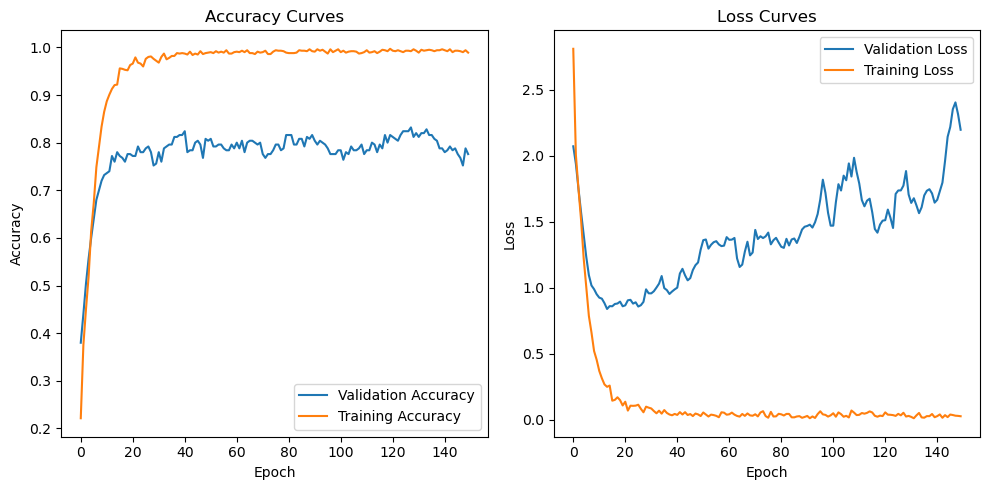

In [77]:
plot_training_history(history_model)

**Now The Models with Increasing The Layers And Then Also Changing The Batch Size (Hyperparameter Tuning)**

In [26]:
import tensorflow as tf
import keras
from keras import layers,models
import torch

model = keras.Sequential([
    keras.layers.Dense(2048,activation='relu',input_shape=(3248,)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(12,activation='softmax'),  # Here 4883 are my unique labels
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Different Batch Size Train ANN Model**

**Batch Size  = 16**

In [113]:
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train,y_train,epochs=300,batch_size=16)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)   
    

Epoch 1/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3529 - loss: 2.0717
Epoch 2/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8399 - loss: 0.5543
Epoch 3/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9276 - loss: 0.2417
Epoch 4/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9622 - loss: 0.1486
Epoch 5/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9783 - loss: 0.0901
Epoch 6/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9798 - loss: 0.1384
Epoch 7/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9842 - loss: 0.0706
Epoch 8/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9748 - loss: 0.1371
Epoch 9/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9846 - loss: 0.1016
Epoch 10/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9997 - loss: 0.0011
Epoch 11/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9842 - loss: 0.1216
Epoch 12/300
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step

**Batch Size = 32**

In [116]:
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train,y_train,epochs=300,batch_size=32)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)
    

Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3123 - loss: 2.0760
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8210 - loss: 0.5796
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9663 - loss: 0.1339
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9815 - loss: 0.0629
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9844 - loss: 0.0814
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9874 - loss: 0.0549
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9895 - loss: 0.0436
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9970 - loss: 0.0159
Epoch 9/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9894 - loss: 0.0370
Epoch 10/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9614 - loss: 0.2396
Epoch 11/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9467 - loss: 0.2400
Epoch 12/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step

**Batch Size 64** 

In [118]:
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train,y_train,epochs=300,batch_size=64)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)    

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.3170 - loss: 2.1115
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8214 - loss: 0.6259
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9734 - loss: 0.0958
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9837 - loss: 0.0631
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9952 - loss: 0.0212
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9968 - loss: 0.0155
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9974 - loss: 0.0055
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9989 - loss: 0.0035
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9919 - loss: 0.0406
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9798 - loss: 0.0566
Epoch 12/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step

**Batch Size = 128**

In [121]:
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train,y_train,epochs=300,batch_size=128)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2770 - loss: 2.2406
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7081 - loss: 1.0242
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9610 - loss: 0.1820
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9954 - loss: 0.0242
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9920 - loss: 0.0277
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9942 - loss: 0.0213
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9968 - loss: 0.0185
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9968 - loss: 0.0098
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9995 - loss: 0.0049
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9968 - loss: 0.0212
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step

**Now We Will Be Adding More Layers With Different Activations Also Changeing The Density Of the Model**

**Model 1 With Different Layer (Different activation function and Density)**

In [60]:
import tensorflow as tf
from tensorflow import keras

model_different_activation = keras.Sequential([
    keras.layers.Dense(2048, activation='relu', input_shape=(3248,)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.1)),
    keras.layers.Dense(64, activation=keras.layers.ELU(alpha=1.0)),
    keras.layers.Dense(12, activation='softmax')
])

model_different_activation.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [61]:
X_train = np.array(X_train)
y_train = np.array(y_train)
model_different_activation.fit(X_train,y_train,epochs=100,batch_size=64)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model_different_activation.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)
    

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2953 - loss: 2.2663
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8083 - loss: 0.6370
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9914 - loss: 0.0726
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9974 - loss: 0.0171
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9999 - loss: 0.0019
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9998 - loss: 0.0028 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9983 - loss: 0.0046
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9998 - loss: 0.0020   
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9972 - loss: 0.0075
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/

0.7628205128205128

**Model Same As Above But With Changing The Batch Size = 64 That We Get From The Graph Below**

In [89]:
import tensorflow as tf
from tensorflow import keras

model_different_activation = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(3248,)),
    Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(256, activation='tanh'),
    Dropout(0.5),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(12, activation='softmax')
])

model_different_activation.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = np.array(X_train)
y_train = np.array(y_train)
history_new_model = model_different_activation.fit(X_train,y_train,epochs=80,batch_size=64,validation_split=0.2)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model_different_activation.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2228 - loss: 2.6332 - val_accuracy: 0.4120 - val_loss: 1.9303
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3818 - loss: 1.9464 - val_accuracy: 0.4920 - val_loss: 1.6437
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5123 - loss: 1.5727 - val_accuracy: 0.5600 - val_loss: 1.4641
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6325 - loss: 1.2160 - val_accuracy: 0.6520 - val_loss: 1.2274
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7302 - loss: 0.8212 - val_accuracy: 0.7040 - val_loss: 1.0446
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8131 - loss: 0.5970 - val_accuracy: 0.7480 - val_loss: 0.9585
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8697 - loss: 0.3843 - val_accuracy: 0.7720 - val_loss: 1.0683
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9095 - loss: 0.2577 - val_accuracy: 0.7480 - v

0.7756410256410257

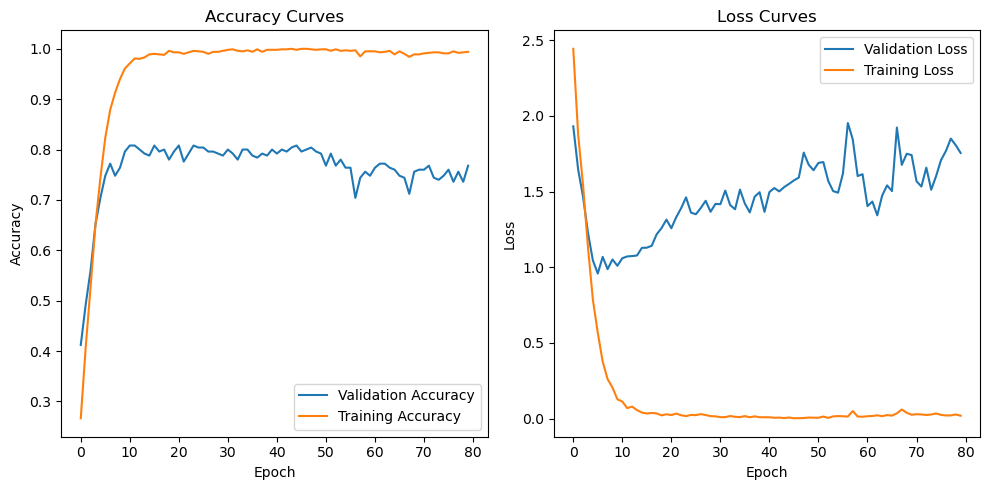

In [90]:
plot_training_history(history_new_model)

**Saving My Best Model With The Concatenated Features**

**Model 3 With Different Layer (Different activation function and Density)**

In [124]:
import tensorflow as tf
from tensorflow import keras

model_different_2 = keras.Sequential([
    keras.layers.Dense(2048, activation='relu', input_shape=(3248,)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='tanh'),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dropout(0.5),  # Adding dropout for regularization
    keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.1)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='sigmoid'),  # Using sigmoid activation for the final layer
    keras.layers.Dense(12, activation='softmax')
])

model_different_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = np.array(X_train)
y_train = np.array(y_train)
model_different_2.fit(X_train,y_train,epochs=300,batch_size=64)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model_different_2.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)


Epoch 1/300


/home/swaksh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/swaksh/anaconda3/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.2335 - loss: 2.3428
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3433 - loss: 2.1069
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4741 - loss: 1.8619
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5228 - loss: 1.6213
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5931 - loss: 1.4249
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6367 - loss: 1.2225
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6972 - loss: 1.0659
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7400 - loss: 0.9474
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7366 - loss: 0.9078
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7479 - loss: 0.8715
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7884 - loss: 0.7728
Epoch 12/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy:

**Model 5 With The Change In The Activation Function** 

In [125]:
import tensorflow as tf
from tensorflow import keras

# Model with Leaky ReLU activation
model = keras.Sequential([
    keras.layers.Dense(2048, activation=tf.nn.leaky_relu, input_shape=(3248,)),
    keras.layers.Dense(1024, activation=tf.nn.leaky_relu),
    keras.layers.Dense(512, activation=tf.nn.leaky_relu),
    keras.layers.Dense(256, activation=tf.nn.leaky_relu),
    keras.layers.Dense(128, activation=tf.nn.leaky_relu),
    keras.layers.Dense(64, activation=tf.nn.leaky_relu),
    keras.layers.Dense(32, activation=tf.nn.leaky_relu),
    keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = np.array(X_train)
y_train = np.array(y_train)
model_different_2.fit(X_train,y_train,epochs=300,batch_size=64)

X_test = np.array(X_test)
y_test = np.array(y_test)
predictions = model_different_2.predict(X_test)
names_p = computeNames(predictions)
computeAccuracy(names_p)


Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8125 - loss: 0.6299
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8250 - loss: 0.6363
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8196 - loss: 0.6549
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8293 - loss: 0.6254
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8240 - loss: 0.5970
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8291 - loss: 0.6187
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8205 - loss: 0.6490
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7977 - loss: 0.6661
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8190 - loss: 0.6111
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8251 - loss: 0.6044
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8450 - loss: 0.5346
Epoch 12/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step

**Seperately Training The HoG,CNN and lbp**

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train_hog = X_train[:,1:945]
X_test_hog = X_test[:,1:945]

X_train_cnn = X_train[:,945:2993]
X_test_cnn = X_test[:,945:2993]

X_train_lbp = X_train[:,2993:]
X_test_lbp = X_test[:,2993:]

print(X_train_hog.shape,X_test_hog.shape,X_train_cnn.shape,X_test_cnn.shape,X_train_lbp.shape,X_test_lbp.shape)



(1248, 944) (312, 944) (1248, 2048) (312, 2048) (1248, 255) (312, 255)


**Train On HoG Features**

In [21]:
import tensorflow as tf
import keras
from keras import layers,models
import torch

model_hog = keras.Sequential([
    keras.layers.Dense(2048,activation='relu',input_shape=(944,)),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(12,activation='softmax'),  # Here 4883 are my unique labels
    
])

model_hog.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(y_train.shape)

X_train_hog = np.array(X_train_hog)
y_train = np.array(y_train)
print(X_train_hog.dtype,y_train.dtype)
model_hog.fit(X_train_hog,y_train,epochs=250,batch_size=64)


X_test_hog = np.array(X_test_hog)
y_test = np.array(y_test)
predictions_10_hog = model_hog.predict(X_test_hog)

(1248,)
float64 int64
Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2800 - loss: 2.4130
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7737 - loss: 0.8028
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9981 - loss: 0.0345
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9998 - loss: 0.0050
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 3.8570e-04
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 1.5822e-04
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 1.1567e-04
Epoch 9/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 9.6771e-05
Epoch 10/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 1.0000 - loss: 8.5681e-05
Epoch 11/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 7.8369e-05
Epoch 

**From The Mapped lables To Names Get y_pred_hog Names And Accuracy Calculation**

In [23]:
y_pred_hog = []
for pred in predictions_10_hog:
    y_pred_hog.append(np.argmax(pred))
    
y_pred_hog = np.array(y_pred_hog)
print(y_pred_hog)

[10  9  1  8  7  3  3  1  8  3  1  9  1  2  1  8  1  1  1  3  1  0  1  4
  3  7  1  4  3  3  2  3  3  4  1  1  4  3  1 10  1  1  1  4  4  9  3  3
  3  4  1  1  8  5  4  1  3  1  6  2  1  1  8  5  1  1  1  7  1  1  3  6
  2  1  1  8  2  3  1  1  0  1  3  6  3  4  3  6 10  1  2  1  1  3  8  1
  3  1  3  1  2  4  8  6  1  1  3  3  0  1  1  3  3  4  5  1  1  6  1 11
  9  1  1  2  4  9  3  0 11  1  2  2  1  0  2  9  6  8  1  1  9  1  3  0
  1  1  3  6  2  7  1  9  4  1  2  1  1  6  1  1  1  0  1  3  5  3  8  6
  1  1  1  3  1  1  1  1  3  1  1  7  4  3  1  3  4  1  1  4  1  1  1  3
  0  4  2  9  1  5  9  2  8  4  3  2 11  3 10  1  1  1  2  3  9  5  9  9
  1  1  4  1  4  5  2  1  1  9  6  1  3  5  1  1  1  1  9  8 11  1  7  1
  1  1  4  1  1  3  3  1  1  3  1  1  1  5  1  9  9  1  1  1  3  5  1  1
  6  2  1  0  4  3  1  9  6  1  3  3  1  3 11  8  1  1  1  1  3  1  3  3
  5  9  3  2  9  4  1  4  4 11  1  6  3  2  2  2  1  0  1  9  1  4  1  4]


In [24]:
y_pred_hog_names = []

for label in y_pred_hog:
    y_pred_hog_names.append(y_train_labels_to_names[label])
    
y_pred_hog_names = np.array(y_pred_hog_names)
print(y_pred_hog_names)

count = 0
for i in range(len(y_pred_hog_names)):
    if y_pred_hog_names[i] == y_test[i]:
        print("y_pred_names of hog is: ",y_pred_hog_names[i] ," and ","y_test name is: ",y_test[i])
        count+=1
        
accuracy_hog = count/len(y_pred_hog_names)
    
print("\n\nAccuracy is this: ",accuracy_hog)

['Serena_Williams' 'Gerhard_Schroeder' 'George_W_Bush' 'Jacques_Chirac'
 'Jean_Chretien' 'Colin_Powell' 'Colin_Powell' 'George_W_Bush'
 'Jacques_Chirac' 'Colin_Powell' 'George_W_Bush' 'Gerhard_Schroeder'
 'George_W_Bush' 'Donald_Rumsfeld' 'George_W_Bush' 'Jacques_Chirac'
 'George_W_Bush' 'George_W_Bush' 'George_W_Bush' 'Colin_Powell'
 'George_W_Bush' 'Hugo_Chavez' 'George_W_Bush' 'Tony_Blair' 'Colin_Powell'
 'Jean_Chretien' 'George_W_Bush' 'Tony_Blair' 'Colin_Powell'
 'Colin_Powell' 'Donald_Rumsfeld' 'Colin_Powell' 'Colin_Powell'
 'Tony_Blair' 'George_W_Bush' 'George_W_Bush' 'Tony_Blair' 'Colin_Powell'
 'George_W_Bush' 'Serena_Williams' 'George_W_Bush' 'George_W_Bush'
 'George_W_Bush' 'Tony_Blair' 'Tony_Blair' 'Gerhard_Schroeder'
 'Colin_Powell' 'Colin_Powell' 'Colin_Powell' 'Tony_Blair' 'George_W_Bush'
 'George_W_Bush' 'Jacques_Chirac' 'Junichiro_Koizumi' 'Tony_Blair'
 'George_W_Bush' 'Colin_Powell' 'George_W_Bush' 'Ariel_Sharon'
 'Donald_Rumsfeld' 'George_W_Bush' 'George_W_Bush' 'Jac

**Train On CNN Features**

In [42]:
import tensorflow as tf
import keras
from keras import layers,models
import torch

model_cnn = keras.Sequential([
    keras.layers.Dense(2048,activation='relu',input_shape=(2048,)),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(12,activation='softmax'),  # Here 4883 are my unique labels
    
])

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(y_train.shape)

X_train_cnn = np.array(X_train_cnn)
y_train = np.array(y_train)
model_cnn.fit(X_train_cnn,y_train,epochs=250,batch_size=64)

X_test_cnn = np.array(X_test_cnn)
y_test = np.array(y_test)
predictions_10_cnn = model_cnn.predict(X_test_cnn)

(1248,)
Epoch 1/250


/home/swaksh/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1465 - loss: 32.3802
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.1786 - loss: 7.5418
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3648 - loss: 2.2473
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3562 - loss: 2.1463
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3337 - loss: 2.1567
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3656 - loss: 2.0299
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3633 - loss: 1.9780
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3753 - loss: 1.9261
Epoch 9/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4621 - loss: 1.7539
Epoch 10/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4576 - loss: 1.6871
Epoch 11/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5066 - loss: 1.5777
Epoch 12/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy

**From The Mapped lables To Names Get y_pred_cnn Names And Accuracy Calculation**

In [26]:
y_pred_cnn = []
for prediction in predictions_10_cnn:
    y_pred_cnn.append(np.argmax(prediction))
    
y_pred_cnn = np.array(y_pred_cnn)
print(y_pred_cnn)

[10  2  3  9  3  3  1  2  3  3  1  9  0  1  5  8  1  1  1  3  0  0  1  3
  9  9  1  4  8  3  2  3  3  1  1  8  8 10  1 10  1  2  1  4  1  9  8  1
  3  4  0  1  4  4  4  1  6  1 10  2  1  0  1  5  1  1  1  2  1  1  3  6
  2  4  1  1  2  6  1  4  9  1  3  9  3  4  8  1 10  5  2  1  1  3  9  1
  6  1  3  1  2  9  1  1  1  1 11  6  9  1  2  3  3  3  5  2  1  3  2 11
  9  5  1  9  4  9  1  0  1  1 11  2  1  0  2  2  6  8  1  1  3  2  3  9
  9  1  4  3  2  7  1  1  3  1  2  1  0  0  1  1  1 11  9  1  5  9  8  6
  1  1  4  0  4  1  1  1  3  1  1  6  1  3  0  1  0  3  1 10  1  1  1  3
  0  4  2  0  2  5  1  0  2  4  3  2  1  3 10  1  0  1  3  3  9  5  1  9
  1  0 11 11  4  5  2  9  6  9  6  1  4  5  1  1 10  1  1  6  2  3  9  1
  9  1  4  1  1 10  3  1  1  1  1  4  1  5  2  1 11  9  9  1  3  3  1  1
  6  2  1  0  4  1  2  9  1  3  3  3  1  3  0  8  2  1  2  9  3  4  3  1
  5  9  3  2  9  4  1 11  3  0  1  6  3  4  2  2  4  0  1  5  1  1  1  4]


In [27]:
y_pred_cnn_names = []

for label in y_pred_cnn:
    y_pred_cnn_names.append(y_train_labels_to_names[label])
    
y_pred_cnn_names = np.array(y_pred_cnn_names)
print(y_pred_cnn_names)

count = 0
for i in range(len(y_pred_cnn_names)):
    if y_pred_cnn_names[i] == y_test[i]:
        print("y_pred_names of cnn is: ",y_pred_cnn_names[i] ," and ","y_test name is: ",y_test[i])
        count+=1
        
accuracy_cnn = count/len(y_pred_cnn_names)
    
print("\n\nAccuracy is this: ",accuracy_cnn)

['Serena_Williams' 'Donald_Rumsfeld' 'Colin_Powell' 'Gerhard_Schroeder'
 'Colin_Powell' 'Colin_Powell' 'George_W_Bush' 'Donald_Rumsfeld'
 'Colin_Powell' 'Colin_Powell' 'George_W_Bush' 'Gerhard_Schroeder'
 'Hugo_Chavez' 'George_W_Bush' 'Junichiro_Koizumi' 'Jacques_Chirac'
 'George_W_Bush' 'George_W_Bush' 'George_W_Bush' 'Colin_Powell'
 'Hugo_Chavez' 'Hugo_Chavez' 'George_W_Bush' 'Colin_Powell'
 'Gerhard_Schroeder' 'Gerhard_Schroeder' 'George_W_Bush' 'Tony_Blair'
 'Jacques_Chirac' 'Colin_Powell' 'Donald_Rumsfeld' 'Colin_Powell'
 'Colin_Powell' 'George_W_Bush' 'George_W_Bush' 'Jacques_Chirac'
 'Jacques_Chirac' 'Serena_Williams' 'George_W_Bush' 'Serena_Williams'
 'George_W_Bush' 'Donald_Rumsfeld' 'George_W_Bush' 'Tony_Blair'
 'George_W_Bush' 'Gerhard_Schroeder' 'Jacques_Chirac' 'George_W_Bush'
 'Colin_Powell' 'Tony_Blair' 'Hugo_Chavez' 'George_W_Bush' 'Tony_Blair'
 'Tony_Blair' 'Tony_Blair' 'George_W_Bush' 'Ariel_Sharon' 'George_W_Bush'
 'Serena_Williams' 'Donald_Rumsfeld' 'George_W_Bush' 

**Train Model On lbp Features**

In [28]:
import tensorflow as tf
import keras
from keras import layers,models
import torch

model_lbp = keras.Sequential([
    keras.layers.Dense(2048,activation='relu',input_shape=(255,)),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(12,activation='softmax'),  # Here 4883 are my unique labels
    
])

model_lbp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(y_train.shape)

X_train_lbp = np.array(X_train_lbp)
y_train = np.array(y_train)
model_lbp.fit(X_train_lbp,y_train,epochs=250,batch_size=64)

X_test_lbp = np.array(X_test_lbp)
y_test = np.array(y_test)
predictions_10_lbp = model_lbp.predict(X_test_lbp)

(1248,)
Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2821 - loss: 2.2904
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4077 - loss: 1.8588
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4722 - loss: 1.6584
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5938 - loss: 1.2788
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7021 - loss: 0.9648
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8472 - loss: 0.5023
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8703 - loss: 0.4045
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9242 - loss: 0.2646
Epoch 9/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9180 - loss: 0.2498
Epoch 10/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9494 - loss: 0.1846
Epoch 11/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9206 - loss: 0.2950
Epoch 12/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1

**From The Mapped lables To Names Get y_pred_lbp Names And Accuracy Calculation**

In [29]:
y_pred_lbp = []
for prediction in predictions_10_lbp:
    y_pred_lbp.append(np.argmax(prediction))
    
y_pred_lbp = np.array(y_pred_lbp)
print(y_pred_lbp)

[10  3  3  3  4  4  3  3  7  3  2  1  1  1  3  1  1  1  4  1  0  5  9  9
  1  0  1  3  3  3 11  1  7  7  1  3  4  0  3  1  1  2  1  1  2  9  3  1
  9  8  1  1  1  2 10  9  6  6 10  1  7  1  1  1  1  4  1  3  0  3  7  9
  8  1  1  9  7 11  0  9  4 11  3  1  3  4  6  4  1  5  1  1  9  1  1  1
  6  1  3  1  5  4  1  3  1  1  0  1  6  1  1  1  2  4  1  9  6  1  9  3
  1  3  1  1  1  6  3  1  1  3  2  2  1  3  1  2  9  1  1  1  9  1  3  1
  9  1  1  6  7  1  1  5  4  9  0  1  1  4  2  1  1  9  4  1 11  3  8 11
  1  3  0  8  1  1  1  1  1 10  1  6  3  3  9  1  1  6  1  4  1  1  1  9
  1  4  2  1  3  8  1  1  4  1  1  1  3  1 10  1  1  3 10  1  3  2  1  2
  9  3  1  1  7  1  1  1  0  8  6  1  1  1  1  1  2  1  6  1  9  1  8  1
  8  3 11  1  1  7  1  1  1  8  1  4  1  5  4  1  9  1  1  3  3  2  3  1
  0  1  3  7  4  3  1 10  1  1  1  3  8  1  4  8  4  1  1  1  1  1  3  3
  1  4  3 11  9  4  1  8  0  1  1  9  3 10  6  2  5  1  1  1  1  1  1  1]


In [30]:
y_pred_lbp_names = []

for label in y_pred_lbp:
    y_pred_lbp_names.append(y_train_labels_to_names[label])
    
y_pred_lbp_names = np.array(y_pred_lbp_names)
print(y_pred_lbp_names)

count = 0
for i in range(len(y_pred_lbp_names)):
    if y_pred_lbp_names[i] == y_test[i]:
        print("y_pred_names of lbp is: ",y_pred_lbp_names[i] ," and ","y_test name is: ",y_test[i])
        count+=1
        
accuracy_lbp = count/len(y_pred_lbp_names)
    
print("\n\nAccuracy is this: ",accuracy_lbp)

['Serena_Williams' 'Colin_Powell' 'Colin_Powell' 'Colin_Powell'
 'Tony_Blair' 'Tony_Blair' 'Colin_Powell' 'Colin_Powell' 'Jean_Chretien'
 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'George_W_Bush'
 'George_W_Bush' 'Colin_Powell' 'George_W_Bush' 'George_W_Bush'
 'George_W_Bush' 'Tony_Blair' 'George_W_Bush' 'Hugo_Chavez'
 'Junichiro_Koizumi' 'Gerhard_Schroeder' 'Gerhard_Schroeder'
 'George_W_Bush' 'Hugo_Chavez' 'George_W_Bush' 'Colin_Powell'
 'Colin_Powell' 'Colin_Powell' 'John_Ashcroft' 'George_W_Bush'
 'Jean_Chretien' 'Jean_Chretien' 'George_W_Bush' 'Colin_Powell'
 'Tony_Blair' 'Hugo_Chavez' 'Colin_Powell' 'George_W_Bush' 'George_W_Bush'
 'Donald_Rumsfeld' 'George_W_Bush' 'George_W_Bush' 'Donald_Rumsfeld'
 'Gerhard_Schroeder' 'Colin_Powell' 'George_W_Bush' 'Gerhard_Schroeder'
 'Jacques_Chirac' 'George_W_Bush' 'George_W_Bush' 'George_W_Bush'
 'Donald_Rumsfeld' 'Serena_Williams' 'Gerhard_Schroeder' 'Ariel_Sharon'
 'Ariel_Sharon' 'Serena_Williams' 'George_W_Bush' 'Jean_Chretien'
 'G

**On Best Model Train On Hog ,CNN and lbp**

In [131]:
import tensorflow as tf
from tensorflow import keras

model_hog_50 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(944,)),
    Dropout(0.5),
    keras.layers.Dense(128,activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(12,activation='softmax'), 
])

model_hog_50.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_hog = np.array(X_train_hog)
y_train = np.array(y_train)
history_hog = model_hog_50.fit(X_train_hog,y_train,epochs=80,batch_size=64,validation_split=0.2)

X_test_hog = np.array(X_test_hog)
y_test = np.array(y_test)
predictions = model_hog_50.predict(X_test_hog)
names_p = computeNames(predictions)
computeAccuracy(names_p)

Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0812 - loss: 4.0220 - val_accuracy: 0.3400 - val_loss: 2.1211
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2434 - loss: 2.5781 - val_accuracy: 0.3480 - val_loss: 2.1394
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2299 - loss: 2.4111 - val_accuracy: 0.3480 - val_loss: 2.1454
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2990 - loss: 2.1835 - val_accuracy: 0.3560 - val_loss: 2.1167
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3140 - loss: 2.1479 - val_accuracy: 0.3520 - val_loss: 2.0670
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3030 - loss: 2.0561 - val_accuracy: 0.3600 - val_loss: 2.0187
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3622 - loss: 1.9557 - val_accuracy: 0.3560 - val_loss: 1.9953
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3656 - loss: 1.9746 - val_accuracy: 0.3760 - val_loss

0.7628205128205128

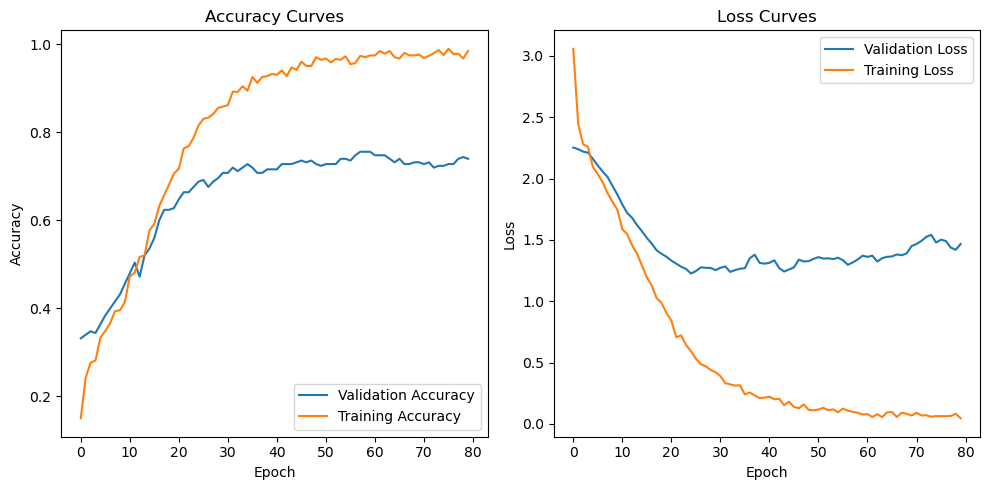

In [97]:
plot_training_history(history_hog)

In [98]:
model_hog_50.save("my_ann_50_hog_model.keras")


In [119]:
import tensorflow as tf
from tensorflow import keras

model_cnn_50 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(2048,)),
    Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    keras.layers.Dense(12, activation='softmax')
])

model_cnn_50.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_cnn = np.array(X_train_cnn)
y_train = np.array(y_train)
history_cnn = model_cnn_50.fit(X_train_cnn,y_train,epochs=70,batch_size=64,validation_split=0.2)

X_test_cnn = np.array(X_test_cnn)
y_test = np.array(y_test)
predictions = model_cnn_50.predict(X_test_cnn)
names_p = computeNames(predictions)
computeAccuracy(names_p)

Epoch 1/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1542 - loss: 3.3363 - val_accuracy: 0.3520 - val_loss: 2.0810
Epoch 2/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2914 - loss: 2.5921 - val_accuracy: 0.3840 - val_loss: 2.1203
Epoch 3/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3082 - loss: 2.3162 - val_accuracy: 0.4080 - val_loss: 2.0961
Epoch 4/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3198 - loss: 2.1560 - val_accuracy: 0.4280 - val_loss: 2.0285
Epoch 5/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3511 - loss: 2.0695 - val_accuracy: 0.4360 - val_loss: 2.0000
Epoch 6/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3801 - loss: 1.9177 - val_accuracy: 0.4600 - val_loss: 1.8919
Epoch 7/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4095 - loss: 1.8491 - val_accuracy: 0.4880 - val_loss: 1.8314
Epoch 8/70
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4477 - loss: 1.7167 - val_accuracy: 0.5000 - val_loss

0.7115384615384616

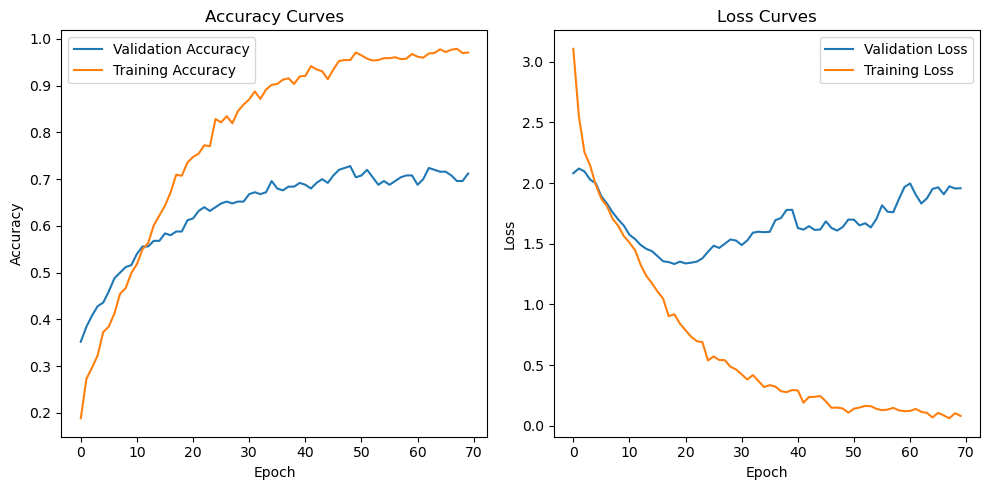

In [120]:
plot_training_history(history_cnn)

In [122]:
import os
directory = "/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/"
model_cnn_50.save(os.path.join(directory, "my_ann_50_cnn_model.keras"))

**For lbp**

In [128]:
import tensorflow as tf
from tensorflow import keras

model_lbp_50 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(255,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(12, activation='softmax')
])

model_lbp_50.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train_lbp = np.array(X_train_lbp)
y_train = np.array(y_train)
history = model_lbp_50.fit(X_train_lbp,y_train,epochs=80,batch_size=16,validation_split=0.2)

X_test_lbp = np.array(X_test_lbp)
y_test = np.array(y_test)
predictions = model_lbp_50.predict(X_test_lbp)
names_p = computeNames(predictions)
computeAccuracy(names_p)

Epoch 1/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2992 - loss: 2.2380 - val_accuracy: 0.3760 - val_loss: 2.0839
Epoch 2/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4444 - loss: 1.7637 - val_accuracy: 0.3720 - val_loss: 2.0280
Epoch 3/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5358 - loss: 1.4640 - val_accuracy: 0.3600 - val_loss: 2.0979
Epoch 4/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6754 - loss: 1.0747 - val_accuracy: 0.3880 - val_loss: 2.1634
Epoch 5/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7760 - loss: 0.7600 - val_accuracy: 0.3480 - val_loss: 2.2134
Epoch 6/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.5452 - val_accuracy: 0.3600 - val_loss: 2.3287
Epoch 7/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.3057 - val_accuracy: 0.3680 - val_loss: 2.4097
Epoch 8/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.1903 - val_accuracy: 0.3880 - val_loss:

0.34294871794871795

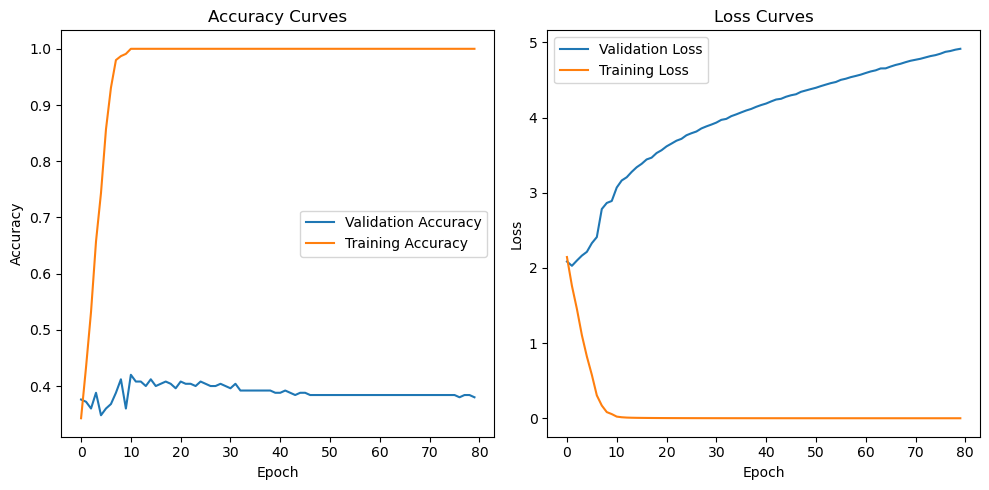

In [129]:
plot_training_history(history=history)

In [55]:
import os
directory = "/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/"
model_lbp_50.save(os.path.join(directory, "my_ann_50_lbp_model.keras"))

**Making The Confusion Matrix Of All The Best Trained Models**

**1st Concatenated features Model**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<Figure size 1000x1200 with 0 Axes>

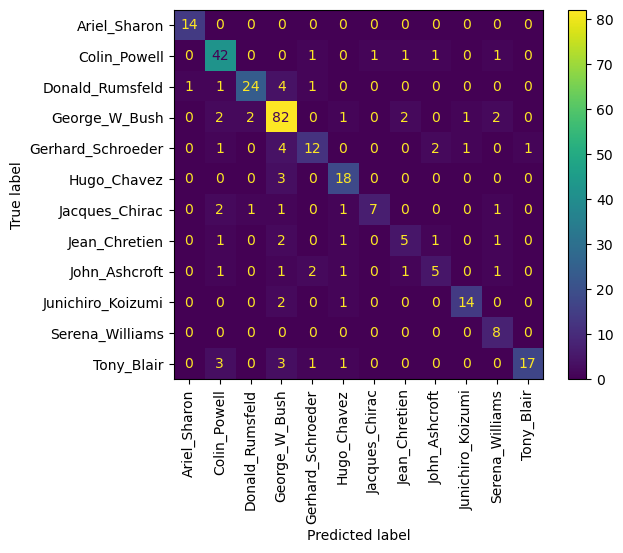

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

# Load the Keras model
model = load_model("/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/my_ann_50_model.keras")

# Predict labels for test data
y_pred = model.predict(X_test)
y_pred_names = computeNames(y_pred)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_names)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=label_encoder.classes_)

plt.figure(figsize=(10, 12))

# Plot confusion matrix
disp.plot(xticks_rotation=90)
plt.show()



**2nd HoG Features Model**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<Figure size 1000x1200 with 0 Axes>

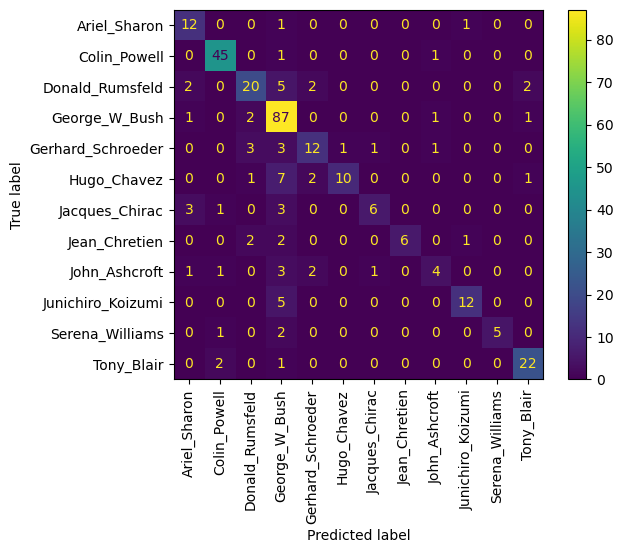

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

# Load the Keras model
model_hog_f = load_model("/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/my_ann_50_hog_model.keras")

# Predict labels for test data
X_test = np.array(X_test)
y_pred = model_hog_f.predict(X_test_hog)
y_pred_names = computeNames(y_pred)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_names)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=label_encoder.classes_)

plt.figure(figsize=(10, 12))

# Plot confusion matrix
disp.plot(xticks_rotation=90)
plt.show()



**3rd CNN Features Model**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<Figure size 1000x1200 with 0 Axes>

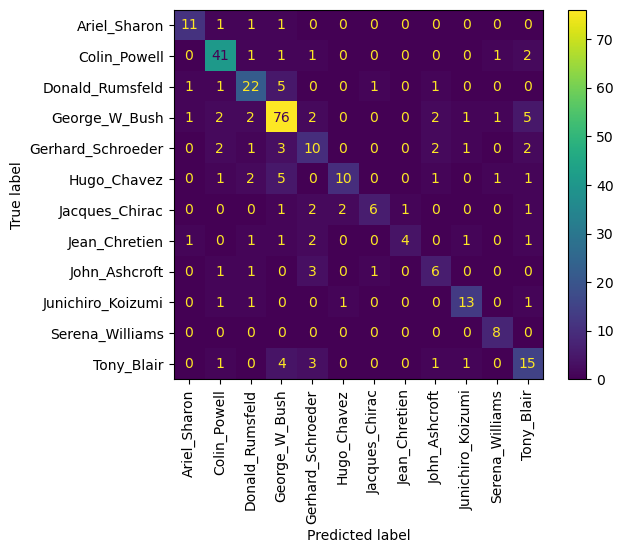

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

# Load the Keras model
model_hog_f = load_model("/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/my_ann_50_cnn_model.keras")

# Predict labels for test data
y_pred = model_hog_f.predict(X_test_cnn)
y_pred_names = computeNames(y_pred)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_names)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=label_encoder.classes_)

plt.figure(figsize=(10, 12))

# Plot confusion matrix
disp.plot(xticks_rotation=90)
plt.show()



**4th lbp Features Model**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Figure size 1000x1200 with 0 Axes>

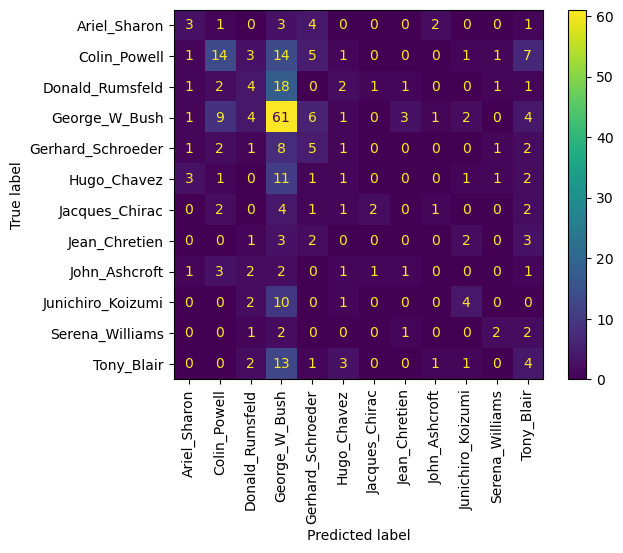

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

# Load the Keras model
model_hog_f = load_model("/home/swaksh/VSCode/prml_project/Face_Recognition/ANN_Models/my_ann_50_lbp_model.keras")

# Predict labels for test data
X_test = np.array(X_test)
y_pred = model_hog_f.predict(X_test_lbp)
y_pred_names = computeNames(y_pred)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred_names)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=label_encoder.classes_)

plt.figure(figsize=(10, 12))

# Plot confusion matrix
disp.plot(xticks_rotation=90)
plt.show()

